Trial #1
Parameters:
   initStretch=0.118287629219
   initStretchPrime=0.0536121817568
   initAngle=0.489364221569
   initAnglePrime=0.0057270729171
Trial #2
Parameters:
   initStretch=0.0869105285426
   initStretchPrime=0.0659987454184
   initAngle=0.503704870325
   initAnglePrime=0.0628913780481


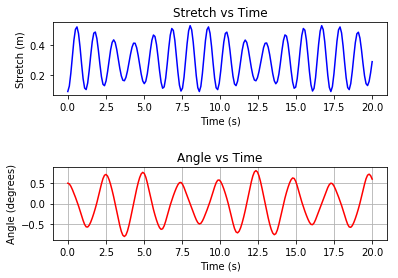

In [10]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from mpmath import mpf

# Solve x'' + (k/m)x - (l+x)(theta)^2 - gcos(theta) = 0, (theta)^2 + (gsin(theta) - 2x'theta')/(l+x)) = 0

# Convert to system of 1st order:
# y1' = y2 
# y2' = (-k/m)*y1 + (l+y1)*(y3)^2 + g*cos(y3)
# y3' = y4
# y4' = (-g*sin(y3) - 2*y2*y4)/(l+y1)
    
def pend(I,t, m, k, l, g):
    dy1dt = I[1]
    dy2dt = (-k/m)*I[0] + (l+I[0])*(I[2])**2 + g*math.cos(I[2])
    dy3dt = I[3]
    dy4dt = ((-g*math.sin(I[2])) - (2*I[1]*I[3]))/(l+I[0])

    return [dy1dt,dy2dt,dy3dt,dy4dt]

t=np.linspace(0,20,200) #creating time array

numTrials = 2

for trial in range(numTrials):
    print("Trial #" + str(trial+1))
    
    #defining parameters
    pendMass=float(str(norm.rvs(1, 0.1)))               # pendulum mass (kilograms)
    springConst=float(str(norm.rvs(30, 0.25)))          # spring constant (Newtons/meter)
    length=float(str(norm.rvs(1, 0.1)))                 # unstretched pendulum length (meters)
    gravAccel=float(str(norm.rvs(9.8, 0.1)))            # acceleration from gravity (meters/second^2)
    
    #defining initial conditions
    initStretch=float(str(norm.rvs(0.1, 0.01)))         # initial stretch (meters)
    initStretchPrime=float(str(norm.rvs(0, .1)))        # initial rate of change in stretch (meters/second)
    initAngle=float(str(norm.rvs(0.5, 0.01)))           # initial angle of swing (degrees)
    initAnglePrime=float(str(norm.rvs(0, .1)))          # initial rate of change in angle (degrees/second)
    initial_conditions = [initStretch, initStretchPrime, initAngle, initAnglePrime]
    
    
    print("Parameters:")
    print("   initStretch=" + str(initStretch))
    print("   initStretchPrime=" + str(initStretchPrime))
    print("   initAngle=" + str(initAngle))
    print("   initAnglePrime=" + str(initAnglePrime))

    C=integrate.odeint(pend, initial_conditions, t, args=(pendMass, springConst, length, gravAccel))     # calling odeint

plt.subplot(2, 1, 1)
plt.plot(t, C[:, 0], 'b')
plt.title('Stretch vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Stretch (m)')

plt.subplot(2, 1, 2)
plt.plot(t, C[:, 2], 'r')
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.subplots_adjust(hspace = 1)

plt.grid()
plt.show()